# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

* 使用已訓練過的detectron2模型對照片做預測
* 使用自己的dataset做訓練

In [1]:
#連接google雲端
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#注意路徑！！
%cd /content/gdrive/My Drive/chris_Detectron2/Detectron2_20200815

/content/gdrive/My Drive/chris_Detectron2/Detectron2_20200815


In [ ]:
!unzip face_mask.zip

Archive:  face_mask.zip
   creating: face_mask/
  inflating: face_mask/.DS_Store     
   creating: __MACOSX/
   creating: __MACOSX/face_mask/
  inflating: __MACOSX/face_mask/._.DS_Store  
   creating: face_mask/train/
  inflating: face_mask/train/via.json  
   creating: __MACOSX/face_mask/train/
  inflating: __MACOSX/face_mask/train/._via.json  
  inflating: face_mask/train/.DS_Store  
  inflating: __MACOSX/face_mask/train/._.DS_Store  
  inflating: face_mask/train/8.jpg   
  inflating: __MACOSX/face_mask/train/._8.jpg  
  inflating: face_mask/train/9.jpg   
  inflating: __MACOSX/face_mask/train/._9.jpg  
  inflating: face_mask/train/10.jpg  
  inflating: __MACOSX/face_mask/train/._10.jpg  
  inflating: face_mask/train/4.jpg   
  inflating: __MACOSX/face_mask/train/._4.jpg  
  inflating: face_mask/train/5.jpg   
  inflating: __MACOSX/face_mask/train/._5.jpg  
  inflating: face_mask/train/7.jpg   
  inflating: __MACOSX/face_mask/train/._7.jpg  
  inflating: face_mask/train/6.jpg   
  in

# 安裝套件及detectron2

In [3]:
!pip install pyyaml==5.1 pycocotools>=2.0.1
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


In [5]:
!pip install -U torch==1.4.0+cu92 torchvision==0.5.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1 pycocotools>=2.0.1 
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.4.0+cu10.2 (from versions: 0.4.1, 0.4.1.post2, 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.2.0+cpu, 1.2.0+cu92, 1.3.0, 1.3.0+cpu, 1.3.0+cu100, 1.3.0+cu92, 1.3.1, 1.3.1+cpu, 1.3.1+cu100, 1.3.1+cu92, 1.4.0, 1.4.0+cpu, 1.4.0+cu100, 1.4.0+cu92, 1.5.0, 1.5.0+cpu, 1.5.0+cu101, 1.5.0+cu92, 1.5.1, 1.5.1+cpu, 1.5.1+cu101, 1.5.1+cu92, 1.6.0, 1.6.0+cpu, 1.6.0+cu101, 1.6.0+cu92, 1.7.0, 1.7.0+cpu, 1.7.0+cu101, 1.7.0+cu110, 1.7.0+cu92, 1.7.1, 1.7.1+cpu, 1.7.1+cu101, 1.7.1+cu110, 1.7.1+cu92, 1.7.1+rocm3.7, 1.7.1+rocm3.8, 1.8.0, 1.8.0+cpu, 1.8.0+cu101, 1.8.0+cu111, 1.8.0+rocm3.10, 1.8.0+rocm4.0.1, 1.8.1, 1.8.1+cpu, 1.8.1+cu101, 1.8.1+cu102, 1.8.1+cu111, 1.8.1+rocm3.10, 1.8.1+rocm4.0.1, 1.9.0, 1.9.0+cpu, 1.9.0+cu102, 1.9.0+cu111, 1.9.0+rocm4.0.1, 1.9.0+rocm4.1, 1.9.0+

In [6]:
#安裝detectron2
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
  Using cached pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [7]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt

# import detectron2相關套件
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

ImportError: ignored

# 第一部分：使用已訓練過的detectron2模型對照片做預測


從coco dataset下載一張照片

--2020-08-14 18:00:41--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.138.91
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.138.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K  1005KB/s    in 0.2s    

2020-08-14 18:00:41 (1005 KB/s) - ‘input.jpg’ saved [209222/209222]



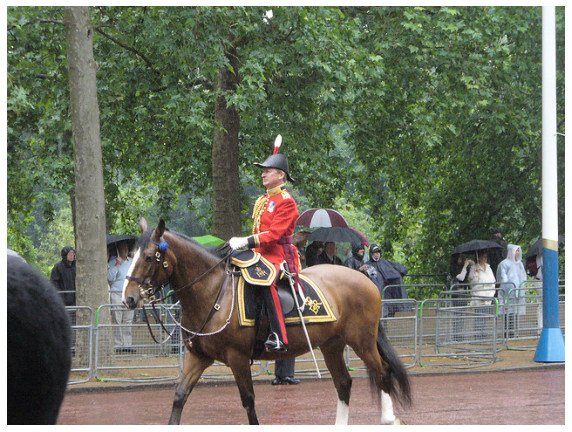

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")
plt.rcParams["figure.figsize"] = (10, 10)
plt.axis('off')
plt.imshow(im[:,:,::-1])

建立config並對剛下載的照片做預測



In [ ]:
#STEP1 : 建立config
cfg = get_cfg() 

In [ ]:
#STEP2 : 把已訓練好的模型加入config
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
#把權重也配置到cfg
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [ ]:
#STEP3 : 設定其他參數
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

In [ ]:
#STEP4 : 用組態檔建立模型
predictor = DefaultPredictor(cfg) 

model_final_f10217.pkl: 178MB [00:02, 83.8MB/s]                           


In [ ]:
#STEP5 : 用模型做預測
outputs = predictor(im)

/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


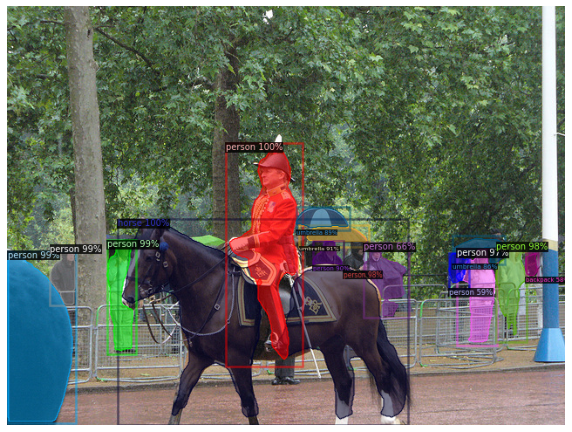

In [ ]:
#STEP6 : 利用Visualizer將預測結果畫在圖片上
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
v = v.draw_instance_predictions(outputs["instances"].to("cpu")) #draw prediction results on images
plt.rcParams["figure.figsize"]=(10,10)
plt.axis("off")
plt.imshow(v.get_image())

# 第二部分：使用自己的dataset做訓練


In [ ]:
#注意路徑！！
%cd /content/gdrive/My Drive/chris_Detectron2/Detectron2_20200815

[Errno 2] No such file or directory: '/content/gdrive/My Drive/chris_Detectron2'
/content


###準備dataset
####STEP1 : 標註
VIA : http://www.robots.ox.ac.uk/~vgg/software/via/via.html

* import 圖片到 VGG Image Annotator(VIA)
* 建立 Attribute，取名為 class
* 設定 Attribute type 為 checkbox
* 開始標註 object
* 標注完，按 ENTER 儲存
* 按空白鍵來打開 annotations
* 為標注完 box 指定正確的 class
* 標注完所有照片，點選上方 Annotations 來輸出 json 檔




####STEP2 : 將 json 檔轉成符合 Detectron2 的格式

In [ ]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2


from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.structures import BoxMode
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode

In [ ]:
def get_facemask_dicts(img_dir):
    """This function loads the JSON file created with the annotator and converts it to 
    the detectron2 metadata specifications.
    """
    # load the JSON file
    json_file = os.path.join(img_dir, "via.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    # loop through the entries in the JSON file
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        # add file_name, image_id, height and width information to the records
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]

        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width

        annos = v["regions"]

        objs = []
        # one image can have multiple annotations, therefore this loop is needed
        for annotation in annos:
            # reformat the polygon information to fit the specifications
            anno = annotation["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            region_attributes = annotation["region_attributes"]["class"]

            # specify the category_id to match with the class.

            if "face_mask" in region_attributes:
                category_id = 0


            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": category_id,
                "iscrowd": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)

    return dataset_dicts

In [ ]:
#注意路徑
for d in ["train","val"]:
    DatasetCatalog.register(
        "face_mask_" + d,
        lambda d=d: get_facemask_dicts("/content/gdrive/My Drive/chris_Detectron2/Detectron2_20200815/face_mask/" + d),
    )


In [ ]:
#測試是否有抓到train的圖片
face_mask_metadata = MetadataCatalog.get("face_mask_train")
#注意路徑
face_mask_dicts = get_facemask_dicts("/content/gdrive/My Drive/chris_Detectron2/Detectron2_20200815/face_mask/train")

for d in face_mask_dicts:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=face_mask_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.rcParams["figure.figsize"]=(10,10)
    plt.axis("off")
    plt.imshow(vis.get_image())
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## 開始訓練!

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

#STEP1 : 建立組態
cfg = get_cfg() 

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml") 
cfg.DATASETS.TRAIN = ("face_mask_train",) #載入剛剛建立的dataset
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4   
cfg.SOLVER.IMS_PER_BATCH = 1 
#調整成適合的learning rate
cfg.SOLVER.BASE_LR = 0.00025 
#調整成適合的訓練次數
cfg.SOLVER.MAX_ITER = 400 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128 
#注意class 數目 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 

In [ ]:
#STEP2 : 建立資料夾存放訓練結果
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
#STEP3 : 用組態檔建立模型
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
#STEP4 : 開始訓練
trainer.train()

[08/14 18:02:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[08/14 18:02:50 d2.engine.train_loop]: Starting training from iteration 0
[08/14 18:02:55 d2.utils.events]:  eta: 0:01:23  iter: 19  total_loss: 1.644  loss_cls: 0.663  loss_box_reg: 0.244  loss_mask: 0.696  loss_rpn_cls: 0.037  loss_rpn_loc: 0.008  time: 0.2201  data_time: 0.0181  lr: 0.000005  max_mem: 1783M
[08/14 18:02:59 d2.utils.events]:  eta: 0:01:20  iter: 39  total_loss: 1.581  loss_cls: 0.617  loss_box_reg: 0.249  loss_mask: 0.688  loss_rpn_cls: 0.030  loss_rpn_loc: 0.006  time: 0.2223  data_time: 0.0021  lr: 0.000010  max_mem: 1783M
[08/14 18:03:04 d2.utils.events]:  eta: 0:01:17  iter: 59  total_loss: 1.478  loss_cls: 0.524  loss_box_reg: 0.280  loss_mask: 0.664  loss_rpn_cls: 0.024  loss_rpn_loc: 0.007  time: 0.2248  data_time: 0.0021  lr: 0.000015  max_mem: 1783M
[08/14 18:03:08 d2.utils.events]:  eta: 0:01:12  iter: 79  total_loss: 1.416  loss_cls: 0.416  loss_box_reg: 0.317  loss_mask: 0.626  loss_rpn_cls: 0.033  loss_rpn_loc: 0.007  time: 0.2249  data_time: 0.0023  lr:

## Run the model we just trained
利用trained model來跑validation dataset


In [ ]:
#cfg放進自己的訓練的權重
#model_final.pth就是我們訓練完的結果，存放在output資料夾
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("face_mask_train", ) 
predictor = DefaultPredictor(cfg)

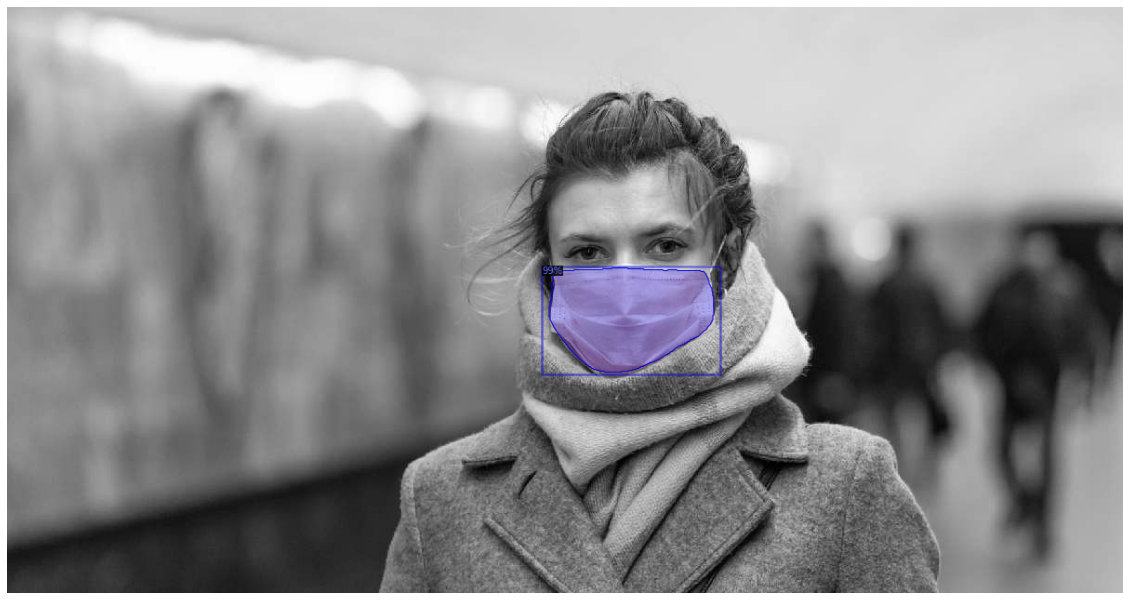

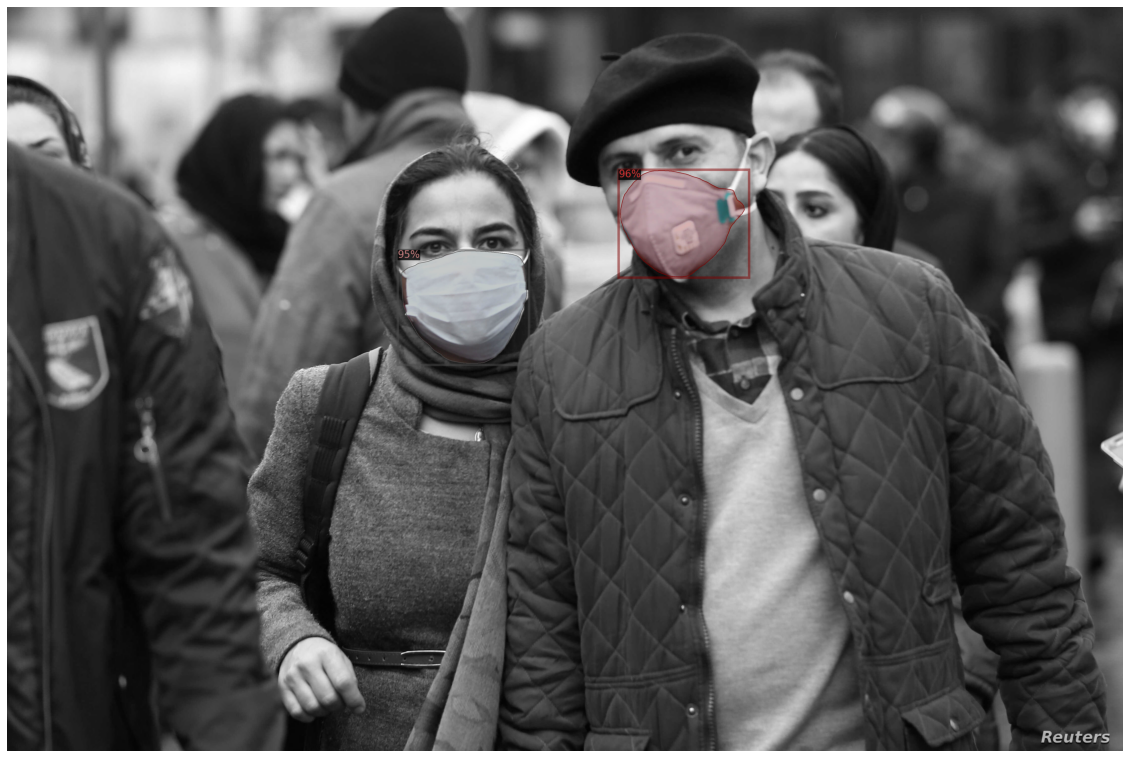

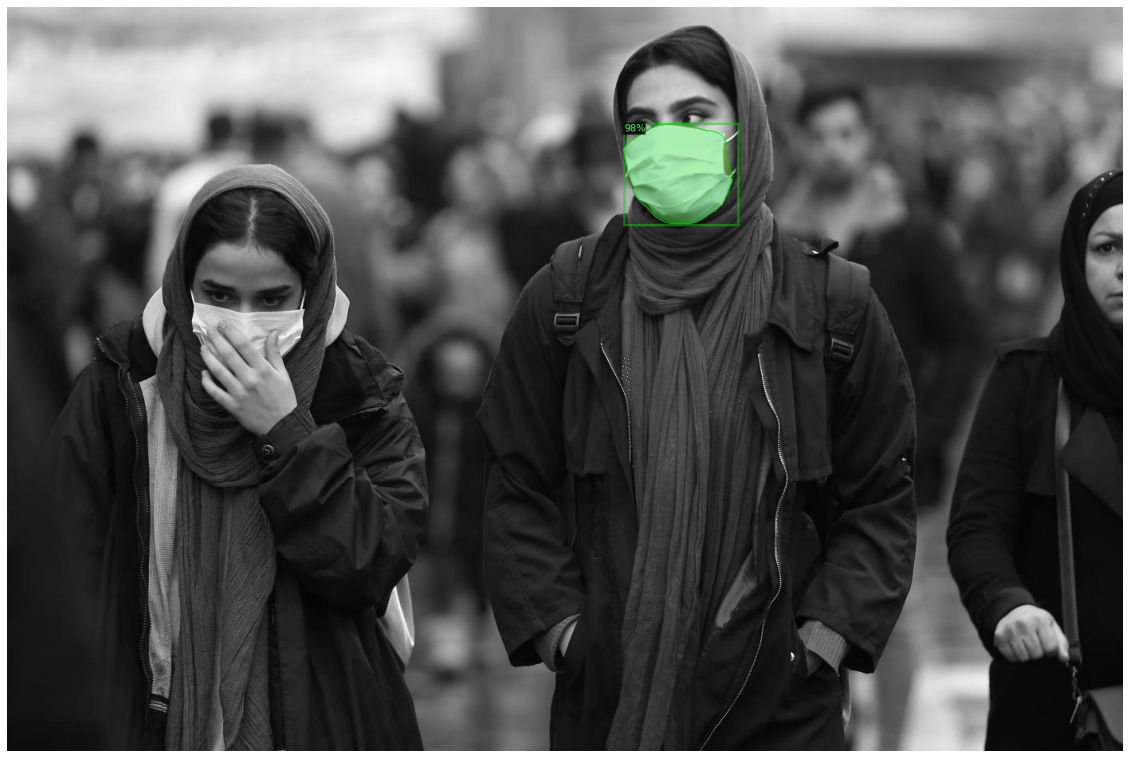

In [ ]:
from detectron2.utils.visualizer import ColorMode

#注意路徑
face_mask_val_dicts = get_facemask_dicts("/content/gdrive/My Drive/chris_Detectron2/Detectron2_20200815/face_mask/val")

for d in face_mask_val_dicts: 
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=face_mask_metadata, 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW)
    
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize=(20,20))
    plt.axis("off")
    plt.imshow(v.get_image())
    plt.show()